# 文本表示

文本表示：将文本数据表示成计算机能够运算的数字或向量。

在自然语言处理（Natural Language Processing，NLP）领域，文本表示是处理流程的第一步，主要是将文本转换为计算机可以运算的数字。

这里多提一下，并不是所有人工智能（AI）模型都要做表示转换的，如计算机视觉（Compute Vision，CV）的图像识别，因为图片存储本身就是数字化的，所以直接用像素值处理就可以，这也是做CV的同学转NLP要注意的一点。

文本表示有两大类方法：
1. 离散表示
2. 分布表示

# 离散表示

## 独热编码（One-hot）

- 思想：

  将语料库中所有的词拉成一个向量，给每个词一个下标，就得到对应的词典。每个分词的文本表示为该分词的比特位为1,其余位为0的矩阵表示。

## 词袋模型(Bag of Words)

- 思想：

  把每篇文章看成一袋子词，并忽略每个词出现的顺序。具体来看：将整段文本表示成一个长向量，每一维代表一个单词。该维对应的权重代表这个词在原文章中的重要程度。

- 例子1：

  句1：Jane wants to go to Shenzhen 句2：Bob wants to go to Shanghai

  使用两个例句来构造词袋： [Jane, wants, to, go, Shenzhen, Bob, Shanghai]

  两个例句就可以用以下两个向量表示，对应的下标与映射数组的下标相匹配，其值为该词语出现的次数

  句1：[1,1,2,1,1,0,0]  句2：[0,1,2,1,0,1,1]

- 例子2：

  这次我们加上停用词和标点符号的处理，

  句1：Jane wants to go to Shenzhen . 句2：Bob wants to go to Shanghai , me too .

In [7]:
sentence1 = 'Jane wants to go to Shenzhen .'
sentence2 = 'Bob wants to go to Shanghai , me too .'

tokens1 = sentence1.split(" ")
tokens2 = sentence2.split(" ")
tokens1

['Jane', 'wants', 'to', 'go', 'to', 'Shenzhen', '.']

In [8]:
def vectorize(tokens, filtered_vocab):
    """
    向量化
    """
    vector = []
    for word in filtered_vocab:
        vector.append(tokens.count(word))
    return vector

def unique(sequence):
    """
    去重
    """
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

    # 或者下面这一行代码的写法就是可以的
    # return list(set(sequence))

# 停用词
stopwords = ["to", "is", "a"]
# 标点符号
special_chars = [",", ":", ";", ".", "?"]

# 创建词汇表
vocab = unique(tokens1 + tokens2)
vocab

['Jane',
 'wants',
 'to',
 'go',
 'Shenzhen',
 '.',
 'Bob',
 'Shanghai',
 ',',
 'me',
 'too']

使用两个例句的tokens，过滤停用词和标点符号后来构造有效词袋：

In [9]:
#过滤停用词和标点符号
filtered_vocab = []
for word in vocab:
    if word not in stopwords and word not in special_chars:
        filtered_vocab.append(word)
filtered_vocab

['Jane', 'wants', 'go', 'Shenzhen', 'Bob', 'Shanghai', 'me', 'too']

两个例句的向量表示：

In [10]:
voctor1 = vectorize(tokens1, filtered_vocab)
print(voctor1)
voctor2 = vectorize(tokens2, filtered_vocab)
print(voctor2)

[1, 1, 1, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 1, 1]


Bag of Words模型向量的size就是vocabulary的size大小，所以该向量表示非常稀疏。


下面演示使用sklearn库做Bag of Words模型：

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

sentence1 = 'Jane wants to go to Shenzhen .'
sentence2 = 'Bob wants to go to Shanghai , me too .'

count_vec = CountVectorizer(ngram_range=(1, 1), stop_words=None) 
#ngram_range=(1, 1)表示每个词作为一个特征，(1, 2)表示每个词和相邻词一起作为特征 如 love you 在ngram_range=(1, 2)时，特征为【love, you, love you】

#transform函数是将文本转化为词频矩阵
feature = count_vec.fit_transform([sentence1, sentence2])

#create dataframe
df = pd.DataFrame(feature.toarray(), columns=count_vec.get_feature_names_out())
df


,bob,go,jane,me,shanghai,shenzhen,to,too,wants
0,0,1,1,0,0,1,2,0,1
1,1,1,0,1,1,0,2,1,1



## 词频-逆向文件频率（TF-IDF）

- 思想：

  字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。如果某个单词在一篇文章中出现的频率TF高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。

- 公式：

  - $TF-IDF(t,d)=TF(t,d) × IDF(t)$
  - $IDF(t)=log\frac {文章总数} {包含单词t的文章总数+1}$
  - $TF=\frac{单词t在文档中出现的次数}{该文档的总词量}$

- 缺点：

  （1）没有考虑特征词的位置因素对文本的区分度，词条出现在文档的不同位置时，对区分度的贡献大小是不一样的。

  （2）按照传统TF-IDF，往往一些生僻词的IDF(反文档频率)会比较高、因此这些生僻词常会被误认为是文档关键词。

  （3）IDF部分只考虑了特征词与它出现的文本数之间的关系，而忽略了特征项在一个类别中不同的类别间的分布情况。

  （4）对于文档中出现次数较少的重要人名、地名信息提取效果不佳。

使用示例：

In [14]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF向量化

sentence1 = "李四爱去深圳"
sentence2 = "王五很爱去上海，我也是"
contents = [sentence1, sentence2]

#参数为CountVectorizer和TfidfVectorizer的所有参数
vec = TfidfVectorizer(tokenizer=jieba.lcut, #使用结巴分词
                      stop_words=stopwords, #停用词
                      norm='l2', #归一化 l2表示欧几里得距离, l1表示曼哈顿距离
                      use_idf=True, smooth_idf=True, sublinear_tf=False)

feature = vec.fit_transform(contents) #将文本转化为词频矩阵
#一步得到tfidf向量
print(feature.toarray())
#create dataframe
df = pd.DataFrame(feature.toarray(), columns=vec.get_feature_names_out())
df

[[0.         0.         0.         0.         0.         0.
  0.57735027 0.57735027 0.         0.57735027 0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.         0.         0.33333333 0.         0.33333333 0.33333333]]


/opt/anaconda3/envs/pythonTry/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,上海,也,去,很,我,是,李四,深圳,爱,爱去,王五,，
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000,0.57735,0.000000,0.000000
1,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.00000,0.00000,0.333333,0.00000,0.333333,0.333333


## N-Gram模型（统计语言模型）

- 统计语言模型：

  是一个基于概率的判别模型。统计语言模型把语言（词的序列）看作一个随机事件，并赋予相应的概率来描述其属于某种语言集合的可能性。
    给定一个词汇集合 V，对于一个由 V 中的词构成的序列S = ⟨w1, · · · , wT ⟩ ∈ Vn，统计语言模型赋予这个序列一个概率P(S)，
    来衡量S 符合自然语言的语法和语义规则的置信度。用一句简单的话说，统计语言模型就是计算一个句子的概率大小的这种模型。

- 思想：

  N-Gram是一种基于统计语言模型的算法。它的基本思想是将文本里面的内容按照字节进行大小为N的滑动窗口操作，形成了长度是N的字节片段序列。
    每一个字节片段称为gram，对所有gram的出现频度进行统计，并且按照事先设定好的阈值进行过滤，形成关键gram列表，也就是这个文本的向
    量特征空间，列表中的每一种gram就是一个特征向量维度。把这些生成一个字典，按照词袋模型的方式进行编码得到结果。

- 例子：
 

In [15]:
sentence1 = 'John likes to watch movies. Mary likes too'
sentence2 = 'John also likes to watch football games.'
tokens1 = sentence1.split(" ")
tokens2 = sentence2.split(" ")

In [27]:
#构建ngram
def create_ngram_set(input_list, ngram_value=2):
    """
    Create a set of n-grams
    :param input_list: [1, 2, 3, 4, 9]
    :param ngram_value: 2
    :return: {(1, 2), (2, 3), (3, 4), (4, 9)}
    """
    return set(zip(*[ input_list[i:] for i in range(ngram_value) ]))  # zip([1,2,3], [2,3]) = [(1,2), (2,3)]


create_ngram_set(tokens1 + tokens2, ngram_value=2)

{('John', 'also'),
 ('John', 'likes'),
 ('Mary', 'likes'),
 ('also', 'likes'),
 ('football', 'games.'),
 ('likes', 'to'),
 ('likes', 'too'),
 ('movies.', 'Mary'),
 ('to', 'watch'),
 ('too', 'John'),
 ('watch', 'football'),
 ('watch', 'movies.')}

构造字典：

```
  {"John likes”: 1, "likes to”: 2, "to watch”: 3, "watch movies”: 4, "Mary likes”: 5, "likes too”: 6, "John also”: 7, "also likes”: 8, “watch football”: 9, "football games": 10}
```
此时，第一句的向量表示为：**[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]**，其中第一个1表示**John likes**在该句中出现了1次，依次类推。

## 离散表示的缺点

- 无法衡量词向量之间的关系。
- 词表的维度随着语料库的增长而膨胀。
- n-gram词序列随语料库增长呈指数型膨胀，更加快。
- 离散数据来表示文本会带来数据稀疏问题，导致丢失了信息，与我们生活中理解的信息是不一样的。

# 分布式表示

主要思想是**用周围的词表示该词**

## 共现矩阵(Cocurrence matrix)

- 思想：

  “共现”，即共同出现，如一句话中共同出现，或一篇文章中共同出现。这里给共同出现的距离一个规范——窗口，如果窗口宽度是2，那就是在当前词的前后各2个词的范围内共同出现。可以想象，其实是一个总长为5的窗口依次扫过所有文本，同时出现在其中的词就说它们共现。

- 例子：

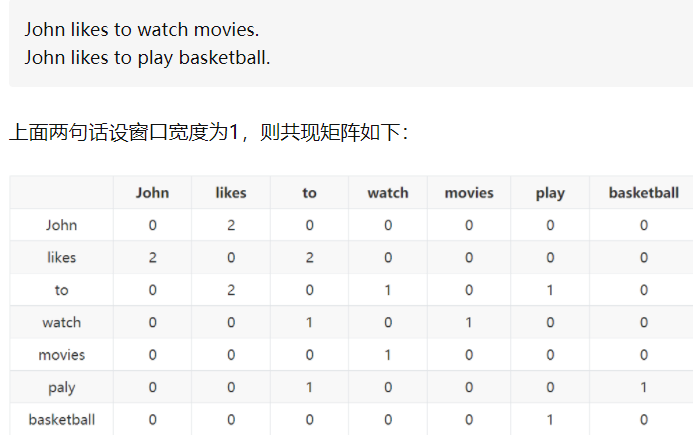


## 神经网络语言模型（NNLM）

- 思想：

  - NNLM是从语言模型出发(即计算概率角度)，构建神经网络针对目标函数对模型进行最优化，训练的起点是使用神经网络去搭建语言模型实现词的预测任务，并且在优化过程后模型的副产品就是词向量。

  - 进行神经网络模型的训练时，目标是进行词的概率预测，就是在词环境下，预测下一个该是什么词，目标函数如下式, 通过对网络训练一定程度后，最后的模型参数就可当成词向量使用。
  - 最后关心的并不是输出层的预测概率，而是通过BP+SGD得到的中间产物：最优投影矩阵C，将其作为文本表示矩阵。

- 概率函数：$f(w_{t},w_{t-1},...,w_{t-n+2}, w_{t-n+1})=p(w_{t} | {w_{1}}^{t-1})$

- 目标函数：![img](http://image.wonkers.cn//5012681-dfd2deb8955da0cb.png)

  - 约束条件：![image-20210118145038303](http://image.wonkers.cn//image-20210118145038303.png)

- 训练过程就是学习θ的最大似然, 其中R(θ) 是正则项。

- 模型结构：
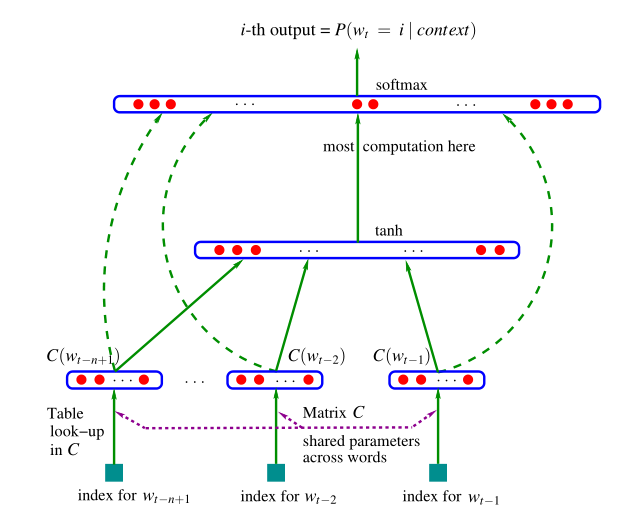

<img src="http://image.wonkers.cn//945696-20170901170825312-1330533346.png" alt="img" style="zoom:80%;" />

- 模型分为两部分：特征映射和计算条件概率分布

  - 特征映射：对应结构图中最底部的紫色虚线Matrix C

    - 目的是进行特征降维，结果是将字典V中的单词onehot特征表示投影转换到稠密词向量表示，作为NNLM的输入。

    <img src="http://image.wonkers.cn//2020-2-19_17-18-49.png" alt="img" style="zoom:80%;" />

  - 计算条件概率分布：经过神经网络的输入层隐藏层后，经softmax做归一化计算概率得到输出层

    ![image-20210118145156054](http://image.wonkers.cn//image-20210118145156054.png)

- 神经网络结构

![img](http://image.wonkers.cn//v2-35870dc7d2e97e2844f9c3aad72a5fb0_720w.jpg)

![image-20210118145332072](http://image.wonkers.cn//image-20210118145332072.png)

直连矩阵W可以加快模型训练速度，但对效果提升不大。直连可以合并词向量不经过隐含层，直接右乘直连矩阵 W 得到 $v \times 1$ 维输出后与前述的 $v \times 1$ 维输出向相加，得到一个最终的 $v \times 1$ 维输出向量。

- 模型训练

![image-20210118145411203](http://image.wonkers.cn//image-20210118145411203.png)

- 流程梳理

![image-20210118150555438](http://image.wonkers.cn//image-20210118150555438.png)

## Word2Vec

- CBOW

  - 获得中间词两边的的上下文，然后用周围的词去预测中间的词，把中间词当做y，把窗口中的其它词当做x输入，x输入是经过one-hot编码过的，然后通过一个隐层进行求和操作，最后通过激活函数softmax，可以计算出每个单词的生成概率，接下来的任务就是训练神经网络的权重，使得语料库中所有单词的整体生成概率最大化，而求得的权重矩阵就是文本表示词向量的结果。
  - 与NNLM的联系：
    - 移除前向反馈神经网络中非线性的hidden layer，直接将中间层的Embedding layer与输出层的softmax layer连接；
    - 忽略上下文环境的序列信息：输入的所有词向量均汇总到同一个Embedding layer；
    - 将Future words纳入上下文环境
  - 模型结构

  <img src="http://image.wonkers.cn//2020-2-19_17-29-38.png" alt="img" style="zoom:50%;" />

  - 流程梳理

  ![image-20210118164239883](http://image.wonkers.cn//image-20210118164239883.png)

- Skip-Gram
  - 通过当前词来预测窗口中上下文词出现的概率模型，把当前词当做x，把窗口中其它词当做y，依然是通过一个隐层接一个Softmax激活函数来预测其它词的概率。
  - Skip-gram模型的本质是**计算输入word的input vector与目标word的output vector之间的余弦相似度，并进行softmax归一化**。我们要学习的模型参数正是这两类词向量。

- 优化tricks

  - 层次Softmax

    - 本质是把 N 分类问题变成 log(N)次二分类
    - hierarchical softmax 使用一颗二叉树表示词汇表中的单词，每个单词都作为二叉树的叶子节点。对于一个大小为V的词汇表，其对应的二叉树包含V-1非叶子节点。假如每个非叶子节点向左转标记为1，向右转标记为0，那么每个单词都具有唯一的从根节点到达该叶子节点的由｛0 1｝组成的代号（实际上为哈夫曼编码，为哈夫曼树，是带权路径长度最短的树，哈夫曼树保证了词频高的单词的路径短，词频相对低的单词的路径长，这种编码方式很大程度减少了计算量）。
    - 使用Huffman Tree来编码输出层的词典，相当于平铺到各个叶子节点上，**瞬间把维度降低到了树的深度**，可以看如下图所示。这课Tree把出现频率高的词放到靠近根节点的叶子节点处，每一次只要做二分类计算，计算路径上所有非叶子节点词向量的贡献即可。
    - <img src="http://image.wonkers.cn//2020-2-19_17-30-36.png" alt="img" style="zoom:80%;" />
    - ![image-20210118165233683](http://image.wonkers.cn//image-20210118165233683.png)

  - 负例采样（Negative Sampling）

    - 在正确单词以外的负样本中进行采样，最终目的是为了减少负样本的数量，达到减少计算量效果。将词典中的每一个词对应一条线段，所有词组成了[0，1］间的剖分，如下图所示，然后每次随机生成一个[1, M-1]间的整数，看落在哪个词对应的剖分上就选择哪个词，最后会得到一个负样本集合。

    - 如果 vocabulary 大小为10000时， 当输入样本 ( "fox", "quick") 到神经网络时， “ fox” 经过 one-hot 编码，在输出层我们期望对应 “quick” 单词的那个神经元结点输出 1，其余 9999 个都应该输出 0。在这里，这9999个我们期望输出为0的神经元结点所对应的单词我们为 negative word. negative sampling 的想法也很直接 ，将随机选择一小部分的 negative words，比如选 10个 negative words 来更新对应的权重参数。

      假设原来模型每次运行都需要300×10,000(其实没有减少数量，但是运行过程中，减少了需要载入的数量。) 现在只要300×(1+10)减少了好多。

    - 选择negative samples：常出现的高频词有更大的概率被选为负例。直接基于词频的权重分布获得概率分布进行抽样

    ![image-20210118170045700](http://image.wonkers.cn//image-20210118170045700.png)

## Glove

**GloVe的全称叫Global Vectors for Word Representation，它是一个基于全局词频统计（count-based & overall statistics）的词表征（word representation）工具，它可以把一个单词表达成一个由实数组成的向量，这些向量捕捉到了单词之间一些语义特性，比如相似性（similarity）、类比性（analogy）等。**我们通过对向量的运算，比如欧几里得距离或者cosine相似度，可以计算出两个单词之间的语义相似性。

实现步骤

- 构建共现矩阵

  根据语料库（corpus）构建一个共现矩阵（Co-ocurrence Matrix）X，**矩阵中的每一个元素 Xij 代表单词 i 和上下文单词 j 在特定大小的上下文窗口（context window）内共同出现的次数。**一般而言，这个次数的最小单位是1，但是GloVe不这么认为：它根据两个单词在上下文窗口的距离 d，提出了一个衰减函数（decreasing weighting）：decay=1/d 用于计算权重，也就是说**距离越远的两个单词所占总计数（total count）的权重越小**。

- 构建词向量和共现矩阵之间的近似关系

  - $w_{i}^{T}\tilde{w_{j}} + b_i + \tilde{b_j} = \log(X_{ij}) \tag{1}$
  - 其中，$w_{i}^{T}$和$\tilde{w_{j}}$是我们最终要求解的词向量；$b_i$和$\tilde b_j$分别是两个词向量的bias term。

- 构建损失函数

  $J = \sum_{i,j=1}^{V} f(X_{ij})(w_{i}^{T}\tilde{w_{j}} + b_i + \tilde{b_j} – \log(X_{ij}) )^2 \tag{2}$

![image-20210118190523016](http://image.wonkers.cn//image-20210118190523016.png)

- 流程梳理

![image-20210118190638818](http://image.wonkers.cn//image-20210118190638818.png)

- Glove与LSA、word2vec的比较

  LSA（Latent Semantic Analysis）是一种比较早的count-based的词向量表征工具，它也是基于co-occurance matrix的，只不过采用了基于奇异值分解（SVD）的矩阵分解技术对大矩阵进行降维，而我们知道SVD的复杂度是很高的，所以它的计算代价比较大。还有一点是它对所有单词的统计权重都是一致的。而这些缺点在GloVe中被一一克服了。而word2vec最大的缺点则是没有充分利用所有的语料，所以GloVe其实是把两者的优点结合了起来。从这篇论文给出的实验结果来看，GloVe的性能是好于LSA和word2vec的，但也有说GloVe和word2vec实际表现其实差不多。
